In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:01<00:00, 154MB/s] 


In [29]:
BATCH_SIZE = 32
IMAGE_SIZE = 128

In [30]:
train_data_dir = r"D:\Image-Classifier-CNN\cats-and-dogs-for-classification\cats_dogs\train"
test_data_dir = r"D:\Image-Classifier-CNN\cats-and-dogs-for-classification\cats_dogs\test"

In [31]:
len(train_data_dir), len(test_data_dir)

(72, 71)

In [32]:
train_data_dir

'D:\\Image-Classifier-CNN\\cats-and-dogs-for-classification\\cats_dogs\\train'

In [33]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="training",          
    seed=42,                    
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.


In [34]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="validation",
    seed=42,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [35]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 2000 files belonging to 2 classes.


In [36]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

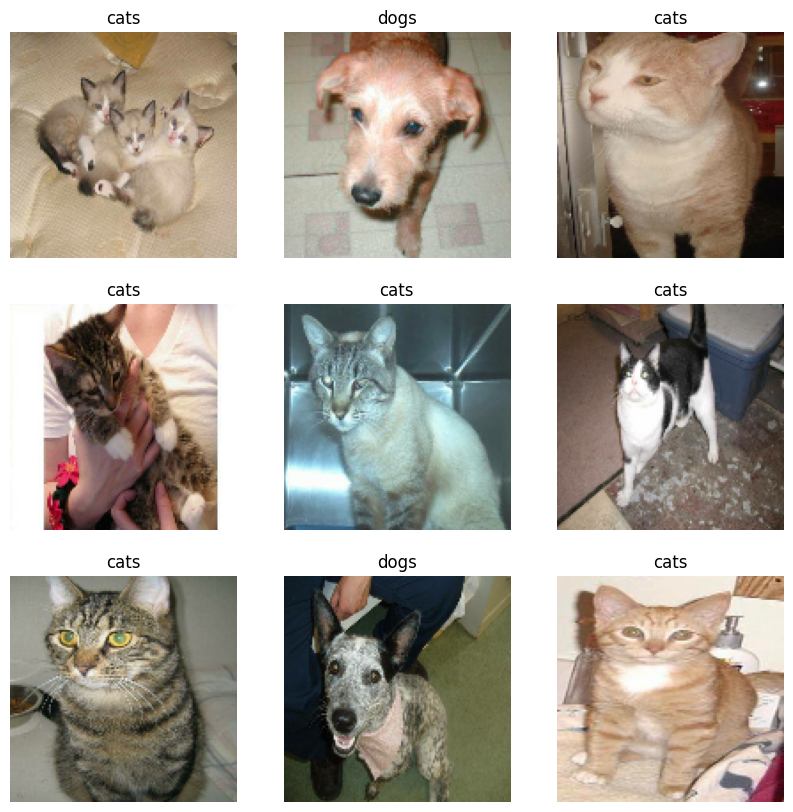

In [37]:
train_data.take(1)
for images, labels in train_data.take(1):  #relavent to first batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [38]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 128, 128, 3)
(32,)


## Data Preprocessing

### Feature Scalling 
Make sure all input features (numbers) are on a similar scale so that models train faster and better.

```
image = image / 255.0

```


### Data Augmentation

Artificially create more training data by modifying existing images.


In [39]:
for image, label in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [40]:
train_data = train_data.map(lambda x,y: (x/255.0, y))  # Normalize the images to [0,1]
validation_data = validation_data.map(lambda x,y: (x/255.0, y))  # Normalize the images to [0,1]
test_data = test_data.map(lambda x,y: (x/255.0, y))  # Normalize the images to [0,1]

In [41]:
for image, labels in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [42]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])  

d:\Image-Classifier-CNN\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

d:\Image-Classifier-CNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,009 (12.65 MB)

 Trainable params: 3,315,009 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])



In [48]:
start_time = time.time()    
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
)

end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 105s 435ms/step - accuracy: 0.5073 - loss: 0.6944 - val_accuracy: 0.5625 - val_loss: 0.6922
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 79s 348ms/step - accuracy: 0.5304 - loss: 0.6888 - val_accuracy: 0.5050 - val_loss: 0.6937
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 79s 349ms/step - accuracy: 0.5183 - loss: 0.6912 - val_accuracy: 0.5800 - val_loss: 0.6697
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 360ms/step - accuracy: 0.5896 - loss: 0.6746 - val_accuracy: 0.6413 - val_loss: 0.6337
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.5985 - loss: 0.6560 - val_accuracy: 0.6413 - val_loss: 0.6416
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 358ms/step - accuracy: 0.6244 - loss: 0.6485 - val_accuracy: 0.6525 - val_loss: 0.6163
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 355ms/step - accuracy: 0.6539 - loss: 0.6215 - val_accuracy: 0.6825 - val_loss: 0.6055
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 88s 392ms/step - accuracy: 0.6436 - loss: 

## Performance Analysis

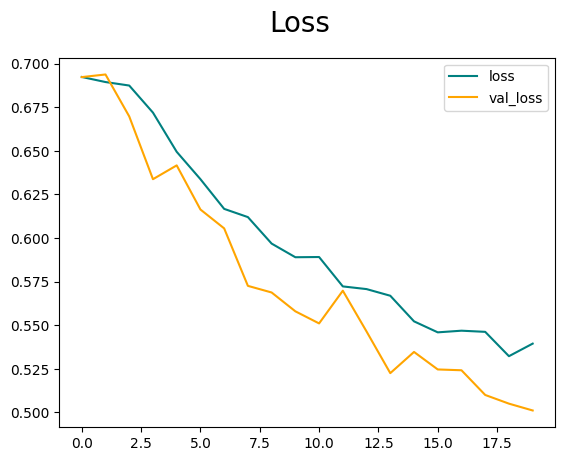

In [49]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

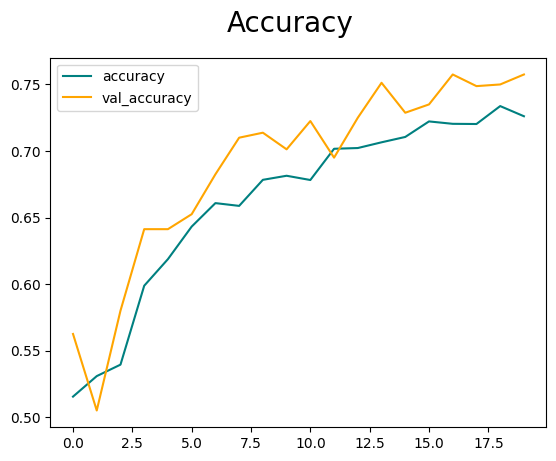

In [50]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

## Modal Evaluation

In [51]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [52]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1

In [53]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7843784093856812>

In [54]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7129999995231628>

In [55]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7584999799728394>

## Test

In [56]:
!pip install opencv-python -q


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import cv2


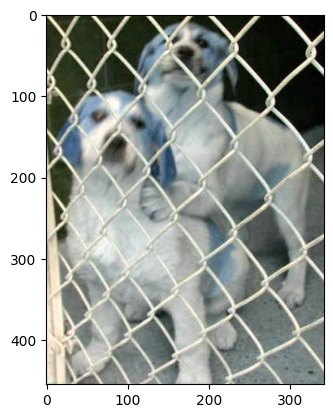

In [61]:
img = cv2.imread(r"D:\Image-Classifier-CNN\cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4008.jpg")
plt.imshow(img)
plt.show()

In [63]:
resized_image = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
scaled_image = resized_image/255

In [64]:
scaled_image.shape

TensorShape([128, 128, 3])

In [66]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [67]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [68]:
yhat

array([[0.75992346]], dtype=float32)

In [69]:

if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
